## CNN Basic Modeling

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

### 1. 데이터 로드 및 탐색

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


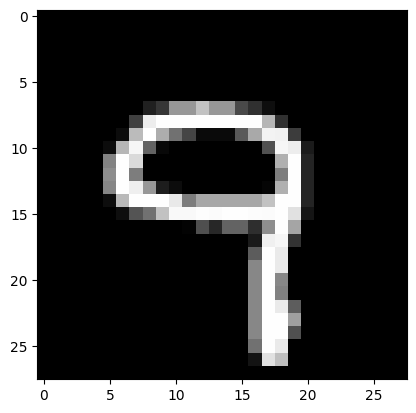

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[10004], cmap='gray')
plt.show()

In [ ]:
# conv layer에 넣어주기 위해서 28x28을 28x28x1 형태로 변경해야한다.
# Nomalization


train_images = train_images.reshape((60000, 28,28,1)) / 255.
test_images = test_images.reshape((10000, 28,28,1)) / 255.

## MLP 의 경우 reshape(-1, 28*28), flatten() 을 사용

### 2. 모델 구축

MLP는 보통 hidden node의 수를 줄이는 방식이 많다.  
CNN은 channel의 수를 늘리는 상황이 많다.

In [ ]:
model = models.Sequential()

# 64개의 kernel(=filter, channel), 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2))) # --> immage가 1/4로 축소
model.add(layers.Conv2D(128, (3, 3),  activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),  activation='relu'))
# feature map 이 256개 생성 --> 이미지에서 피처를 추출함

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)             

In [ ]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 20s 5ms/step - loss: 0.1373 - accuracy: 0.9575 - val_loss: 0.0692 - val_accuracy: 0.9793
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.0426 - val_accuracy: 0.9891
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0386 - val_accuracy: 0.9899
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0474 - val_accuracy: 0.9866


In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0387 - accuracy: 0.9883 - 1s/epoch - 4ms/step
0.9883000254631042
